In [1]:
# 8 Statistical Classification and Decision Theory

## Bayes classifier for Binary classification

In [1]:
import numpy as np
from scipy.stats import norm 
import matplotlib.pyplot as plt

In [2]:
mu1,sigma1 = 0,1
mu2,sigma2 = 3, 1.5
pi1,pi2 = 0.5,0.5
n=200

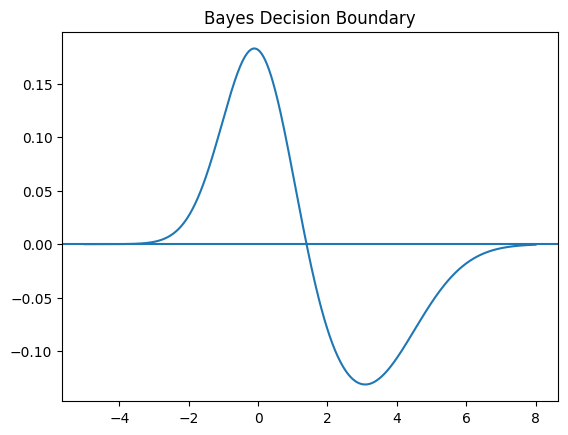

In [3]:
x1 = np.random.normal(mu1,sigma1,n)
x2 = np.random.normal(mu2,sigma2,n)
X= np.concatenate([x1,x2])
y = np.array([0]*n + [1]*n) 

f1=norm.pdf(X, mu1,sigma1)
f2=norm.pdf(y,mu2,sigma2)

post1=pi1*f1/(pi1*f1 + pi2*f2)
post2=pi2*f2/(pi1*f1 + pi2*f2)

y_pred = np.where(post1 > post2, 0,1)

xx = np.linspace(-5,8,500)
g = pi1*norm.pdf(xx,mu1,sigma1) - pi2*norm.pdf(xx,mu2,sigma2)

plt.plot(xx,g)
plt.axhline(0)
plt.title("Bayes Decision Boundary")
plt.show()

## LDA

In [4]:
mu1,mu2=0,3
sigma=1
n=200

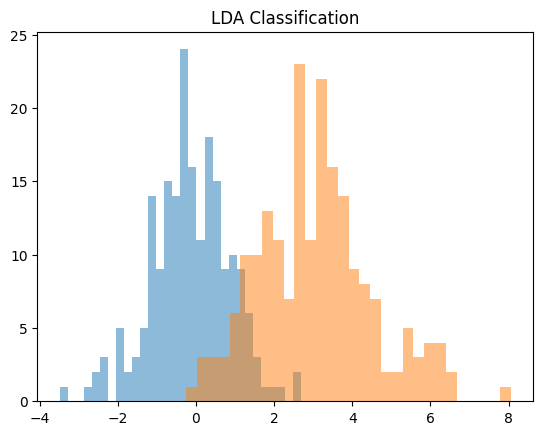

In [5]:
n1=np.random.normal(mu1,sigma,n)
n2=np.random.normal(mu2,sigma,n)
X = np.concatenate([x1,x2])
y = np.array([0]*n + [1]*n)

mu1_hat = np.mean(x1)
mu2_hat = np.mean(x2)
s2_pooled = ((n-1)*np.var(x1) + (n-1)*np.var(x2)) / (2*n-2)

delta = (mu1_hat - mu2_hat)/s2_pooled * X - (mu1_hat**2 - mu2_hat**2)/(2*s2_pooled)

y_pred = np.where(delta > 0, 0, 1)

plt.hist(x1,bins = 30, alpha = 0.5)
plt.hist(x2, bins = 30, alpha = 0.5)
plt.title("LDA Classification")
plt.show()

## QDA

In [6]:

mu1,sigma1 = 0,1
mu2,sigma2 = 3,2 
n=200

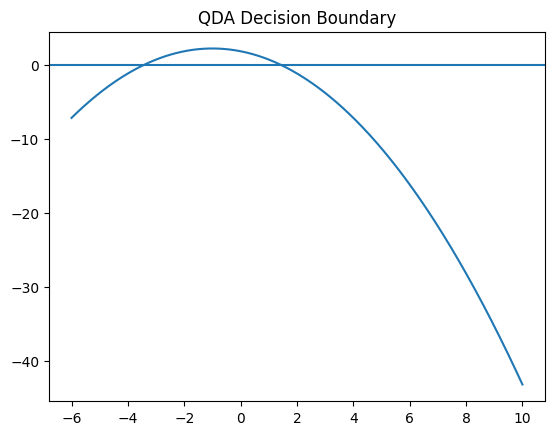

In [12]:
x1 = np.random.normal(mu1,sigma1,n)
x2 = np.random.normal(mu2,sigma2,n)
X= np.concatenate([x1,x2])
y = np.array([0]*n + [1]*n) 

g1 = -0.5*np.log(sigma1**2) - (X-mu1)**2/(2*sigma1**2)

g2 = -0.5*np.log(sigma2**2) - (X-mu2)**2/(2*sigma2**2)
y_pred = np.where(g1 > g2, 0,1)

xx = np.linspace(-6,10,500)
g = (-0.5*np.log(sigma1**2) - (xx-mu1)**2/(2*sigma1**2)) - (-0.5*np.log(sigma2**2) - (xx-mu2)**2/(2*sigma2**2))

plt.plot(xx,g)
plt.axhline(0)
plt.title("QDA Decision Boundary")
plt.show()


## Misclassification Error and Performance Evaluation


In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_true=y
y_pred_bayes = np.where(post1 > post2, 0,1)
y_bayes = y_pred_bayes
cm_bayes = confusion_matrix(y_true,y_bayes)
err_bayes = 1-accuracy_score(y_true,y_bayes)

y_pred_lda = np.where(delta > 0, 0, 1)
y_lda = y_pred_lda
cm_lda = confusion_matrix(y_true,y_lda)
err_lda = 1-accuracy_score(y_true,y_lda)

y_pred_qda = np.where(g1 > g2, 0,1)
y_qda = y_pred_qda
cm_qda = confusion_matrix(y_true, y_qda)
err_qda = 1-accuracy_score(y_true,y_qda)

print("Bayes Confusion Matrix:\n" , cm_bayes)
print("Bayes Error Rate:" , err_bayes)

print("LDA Confusion Matrix:\n" , cm_lda)
print("LDA Error rate:\n" , err_lda)

print("QDA Confusion Matrix:\n" , cm_qda)
print("QDA Error rate:\n" , err_qda)

TN, FP, FN, TP = cm_lda.ravel()
print("False Positives:", FP)
print("False Negatives:", FN)

print("Bayes Error :", err_bayes)
print("LDA Error :", err_lda)
print("QDA Error :", err_qda)

pi1,pi2 = 0.5,0.5
post1=pi1*f1/(pi1*f1 + pi2*f2)
post2=pi2*f2/(pi1*f1 + pi2*f2)

err_prior = 1-accuracy_score(y_true, y_pred_bayes)
print("Error with changed priors:", err_prior)


Bayes Confusion Matrix:
 [[190  10]
 [ 33 167]]
Bayes Error Rate: 0.10750000000000004
LDA Confusion Matrix:
 [[192   8]
 [ 27 173]]
LDA Error rate:
 0.08750000000000002
QDA Confusion Matrix:
 [[183  17]
 [ 28 172]]
QDA Error rate:
 0.11250000000000004
False Positives: 8
False Negatives: 27
Bayes Error : 0.10750000000000004
LDA Error : 0.08750000000000002
QDA Error : 0.11250000000000004
Error with changed priors: 0.10750000000000004
